# Background
 
A person’s creditworthiness is often associated (conversely) with the likelihood they may default on loans.
<br>We’re giving you anonymized data on about 1000 loan applications, along with a certain set of attributes about the applicant itself, and whether they were considered high risk.
<br>0 = Low credit risk i.e high chance of paying back the loan amount.
<br>1 = High credit risk i.e low chance of paying back the loan amount.


### TASK

<br>Do the Exploratory Data Analysis & share the insights.
<br>How would you segment customers based on their risk (of default).
<br>Which of these segments / sub-segments would you propose be approved?
<br>For e.g. Would a person with critical credit history be more creditworthy? Are young people more creditworthy? Would a <br>person with more credit accounts be more creditworthy?
<br>Tell us what your observations were on the data itself (completeness, skews).

# Dataset Description

The dataset has two files:

#### applicant.csv: 
<br>This file contains personal data about the (primary) applicant
<br>Unique ID: applicant_id (string)
<br>Other fields:
<br>Primary_applicant_age_in_years (numeric)
<br>Gender (string)
<br>Marital_status (string)
<br>Number_of_dependents (numeric)
<br>Housing (string)
<br>Years_at_current_residence (numeric)
<br>Employment_status (string)
<br>Has_been_employed_for_at_least (string)
<br>Has_been_employed_for_at_most (string)
<br>Telephone (string)
<br>Foreign_worker (numeric)
<br>Savings_account_balance (string)
<br>Balance_in_existing_bank_account_(lower_limit_of_bucket) (string)
<br>Balance_in_existing_bank_account_(upper_limit_of_bucket) (string)
#### loan.csv: 
<br>This file contains data more specific to the loan application
<br>Target: high_risk_application (numeric)
<br>Other fields:
<br>applicant_id (string)
<br>Months_loan_taken_for (numeric)
<br>Purpose (string)
<br>Principal_loan_amount (numeric)
<br>EMI_rate_in_percentage_of_disposable_income (numeric)
<br>Property (string)
<br>Has_coapplicant (numeric)
<br>Has_guarantor (numeric)
<br>Other_EMI_plans (string)
<br>Number_of_existing_loans_at_this_bank (numeric)
<br>Loan_history (string)

# Importing the libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data set

In [2]:
#set max columns display limit
pd.set_option("display.max_columns", 40)
#to supress scientific notation
pd.set_option('display.float_format', '{:.3f}'.format)
#set style for graph
sns.set_style(style='darkgrid')

In [3]:
applicant= pd.read_csv('applicant.csv',index_col=0)
loan=pd.read_csv('loan.csv',index_col=0)

In [4]:
applicant.head()

,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
applicant_id,,,,,,,,,,,,,,
1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [5]:
loan.head()

,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
loan_application_id,,,,,,,,,,,,
d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [6]:
applicant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1469590 to 1660770
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Primary_applicant_age_in_years                            1000 non-null   int64 
 1   Gender                                                    1000 non-null   object
 2   Marital_status                                            1000 non-null   object
 3   Number_of_dependents                                      1000 non-null   int64 
 4   Housing                                                   1000 non-null   object
 5   Years_at_current_residence                                1000 non-null   int64 
 6   Employment_status                                         1000 non-null   object
 7   Has_been_employed_for_at_least                            938 non-null    object
 8   Has_been_employed_f

We have 15 columns and 1000 rows in the applicant data set.
<br>We can see that there are 6 attributes that have null values and we will need to handle them.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, d68d975e-edad-11ea-8761-1d6f9c1ff461 to d68fbdae-edad-11ea-a2ea-1c661d77d225
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   applicant_id                                 1000 non-null   int64 
 1   Months_loan_taken_for                        1000 non-null   int64 
 2   Purpose                                      988 non-null    object
 3   Principal_loan_amount                        1000 non-null   int64 
 4   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 5   Property                                     846 non-null    object
 6   Has_coapplicant                              1000 non-null   int64 
 7   Has_guarantor                                1000 non-null   int64 
 8   Other_EMI_plans                              186 non-null    object
 9   Number_of_existing_loan

There are 13 columns and 1000 rows in this data set.
<br> There are 3 attributes which have null values, hence need to be handled.

#### Inference:
We can see that the applicant and the loan data set have one common attribute, i.e , 'applicant_id'. Hence we can merge the two datasets through this attribute to do better analysis.

#  Merging the two datasets

In [8]:
merged_df = applicant.merge(loan, how = 'inner', on = 'applicant_id',)
# 'merged_df' will be the name of the merged dataframe

In [9]:
merged_df.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket),Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


In [10]:
merged_df.shape

(1000, 26)

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

We have a unique ID column named 'application_id'  which is not important to find any insights in the data, hence we will drop them.

In [12]:
#droping unique id columns
merged_df.drop(columns=['applicant_id'],inplace=True)

In [13]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Primary_applicant_age_in_years,1000.000,35.546,11.375,19.000,27.000,33.000,42.000,75.000
Number_of_dependents,1000.000,1.155,0.362,1.000,1.000,1.000,1.000,2.000
Years_at_current_residence,1000.000,2.845,1.104,1.000,2.000,3.000,4.000,4.000
Foreign_worker,1000.000,0.963,0.189,0.000,1.000,1.000,1.000,1.000
Months_loan_taken_for,1000.000,20.903,12.059,4.000,12.000,18.000,24.000,72.000
Principal_loan_amount,1000.000,3271258.000,2822736.876,250000.000,1365500.000,2319500.000,3972250.000,18424000.000
EMI_rate_in_percentage_of_disposable_income,1000.000,2.973,1.119,1.000,2.000,3.000,4.000,4.000
Has_coapplicant,1000.000,0.041,0.198,0.000,0.000,0.000,0.000,1.000
Has_guarantor,1000.000,0.052,0.222,0.000,0.000,0.000,0.000,1.000
Number_of_existing_loans_at_this_bank,1000.000,1.407,0.578,1.000,1.000,1.000,2.000,4.000


#### Inference
The range of different attributes are as follows-
<br> Applicant age- 19 to 75 years
<br> Number_of_dependents- 1 to 2
<br> Years_at_current_residence- 1 to 4 years
<br> Months_loan_taken_for- 4 to 72 months.
<br> Principal_loan_amount- 250000 to 18424000 

# Data Cleaning Process

First, we will check how many missing/null values are present in our dataset attribute-wise.

In [14]:
merged_df.isnull().sum()

Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Months_loan_taken_for                                         0
Purpose                                 

<br>We can see that there are 9 attributes which are around 50% or more than 50% of null values.
<br>We cannot drop all the columns which have null values directly as our prediction process will be hampered.
<br>We will have to handle the data.

#### 1. Other_EMI_Plans column

In [15]:
merged_df['Other_EMI_plans'].value_counts()

bank      139
stores     47
Name: Other_EMI_plans, dtype: int64

We see that this column has more than 80% of null values in their data set, hence we will drop this column

In [16]:
drop_columns=['Other_EMI_plans']

#### 2. Telephone column

In [17]:
merged_df['Telephone'].value_counts()

Registered under the applicant's name    404
Name: Telephone, dtype: int64

The telephone column is a column with unique values for all the applicants just like 'applicant_id' column, hence we will drop that column.

In [18]:
drop_columns.append('Telephone')

#### 3.Balance_in_existing_bank_account_(lower_limit_of_bucket) column
#### 4.Balance_in_existing_bank_account_(upper_limit_of_bucket) column


In [19]:
merged_df['Balance_in_existing_bank_account_(lower_limit_of_bucket)'].value_counts()


0        269
2 lac     63
Name: Balance_in_existing_bank_account_(lower_limit_of_bucket), dtype: int64

In [20]:
merged_df['Balance_in_existing_bank_account_(upper_limit_of_bucket)'].value_counts()


0        274
2 lac    269
Name: Balance_in_existing_bank_account_(upper_limit_of_bucket), dtype: int64

These 2 columns also have null values near and greater than 50 % hence we will drop them.

In [21]:
drop_columns.append('Balance_in_existing_bank_account_(upper_limit_of_bucket)')
drop_columns.append('Balance_in_existing_bank_account_(lower_limit_of_bucket)')

#### 5. Purpose column

In [22]:
merged_df['Purpose'].value_counts()

electronic equipment    280
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career development        9
Name: Purpose, dtype: int64

Visualizing the same unique values in a bar_plot

<AxesSubplot:>

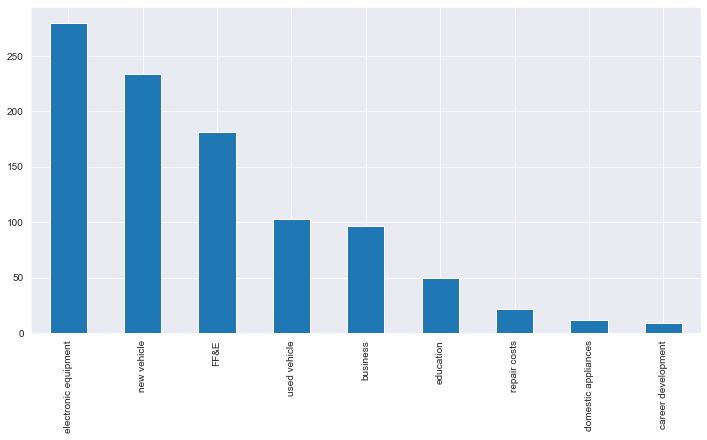

In [23]:
plt.figure(figsize=(12,6))
merged_df['Purpose'].value_counts().plot(kind='bar')

We can see that purpose is a categorical column, therefore we can replace the null values using the mode of the dataset

In [24]:
#replacing null values with mode
merged_df['Purpose'].fillna(merged_df['Purpose'].mode()[0],inplace=True)

#### 6.Has_been_employed_for_at_most column
#### 7.Has_been_employed_for_at_least column

In [25]:
merged_df['Has_been_employed_for_at_least'].value_counts()

1 year     339
7 years    253
4 years    174
0 year     172
Name: Has_been_employed_for_at_least, dtype: int64

In [26]:
merged_df['Has_been_employed_for_at_most'].value_counts()

4 years    339
7 years    174
1 year     172
0 year      62
Name: Has_been_employed_for_at_most, dtype: int64

We can see that the range of these two columns range from 0 to 7 years
<br> The 'Has_been_employed_for_atleast' column should have it's null values replace with 0, becuase if we use the mode, there might be an instance where an employee may have been employed for more than the max value.

In [27]:
#replacing null values with 0 year
merged_df['Has_been_employed_for_at_least'].fillna('0 year', inplace=True)

We need to understand that just like Has_been_employed_for_at_most column we cannot fill the null values in Has_been_employed_for_at_least column with the mode asthere could always have been an instance where the value was greater than max.
<br> Hence we can replace this column with maximum value that is 7 years.

In [28]:
merged_df['Has_been_employed_for_at_most'].fillna('7 years',inplace=True)

#### 8. Property Column

In [29]:
#checking property column value count
merged_df['Property'].value_counts()

car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

We can replace the null values in property column with the mode that is 'car or other'

In [30]:
merged_df['Property'].fillna(merged_df['Property'].mode()[0],inplace=True)

#### 9. Savings_account_balance column

In [31]:
merged_df['Savings_account_balance'].value_counts()


Low          603
Medium       103
High          63
Very high     48
Name: Savings_account_balance, dtype: int64

We will again replace the null values in this column wit the mode of the data set wehich is 'Low' and also, it is more than 60% of the column

In [32]:
merged_df['Savings_account_balance'].fillna(merged_df['Savings_account_balance'].mode()[0],inplace=True)

In [33]:
merged_df.drop(columns=drop_columns,inplace=True)

# DATA EXPLORATION

### Analyzing the Categorical Variables

In [34]:
#selecting the categorical columns
categorical_var = merged_df.select_dtypes(include=['object'])
categorical_var.head()

,Gender,Marital_status,Housing,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Savings_account_balance,Purpose,Property,Loan_history
0,male,single,own,skilled employee / official,7 years,7 years,Low,electronic equipment,real estate,critical/pending loans at other banks
1,female,divorced/separated/married,own,skilled employee / official,1 year,4 years,Low,electronic equipment,real estate,existing loans paid back duly till now
2,male,single,own,unskilled - resident,4 years,7 years,Low,education,real estate,critical/pending loans at other banks
3,male,single,for free,skilled employee / official,4 years,7 years,Low,FF&E,building society savings agreement/life insurance,existing loans paid back duly till now
4,male,single,for free,skilled employee / official,1 year,4 years,Low,new vehicle,car or other,delay in paying off loans in the past


We have created a function check_count where we will be passing each column of the categorical variable to view a count plot of them

In [35]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15
plt.rcParams["axes.titlesize"] = 25

In [36]:
def check_count_viz(variable):
    plt.figure(figsize=(12,8))
    sns.countplot(variable,data=merged_df)
    plt.xlabel(variable)
    plt.xticks(rotation=45)
    plt.title(variable);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

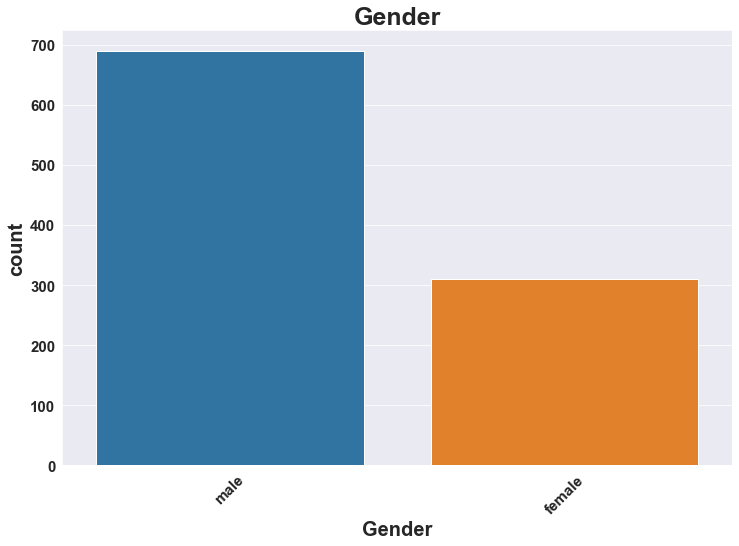

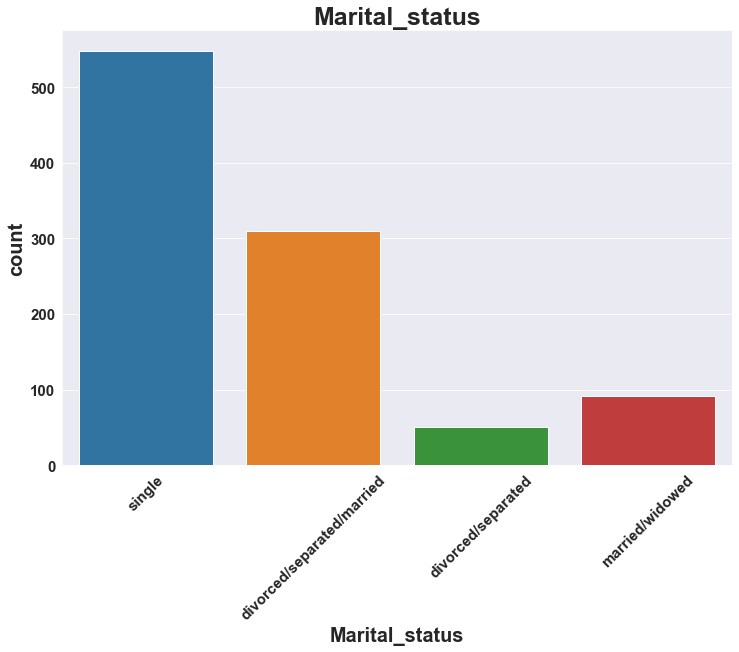

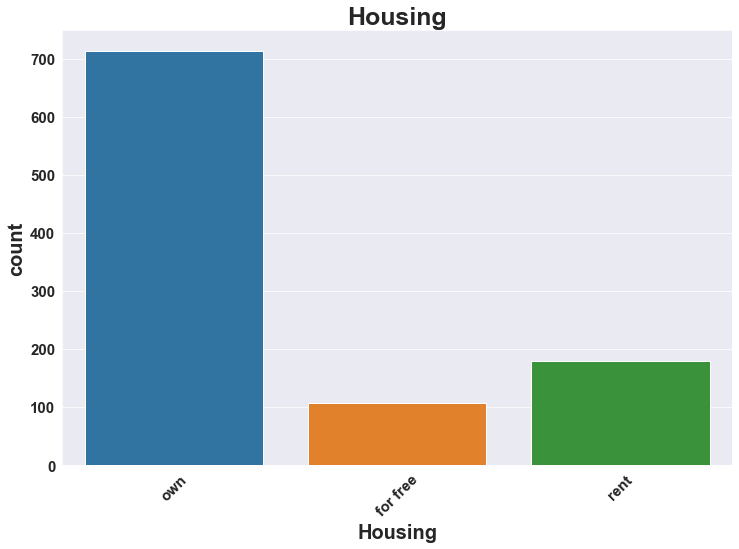

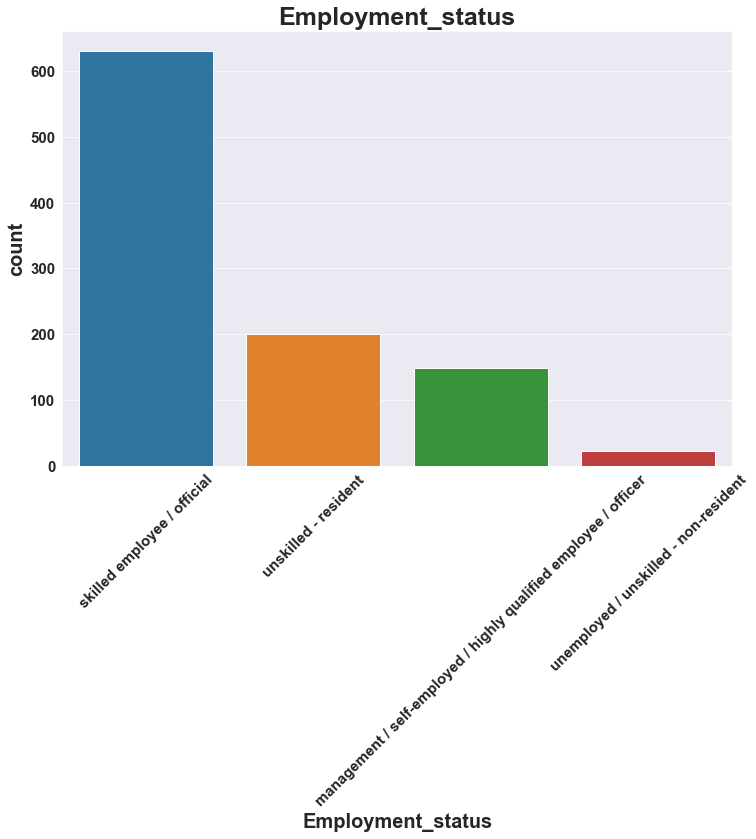

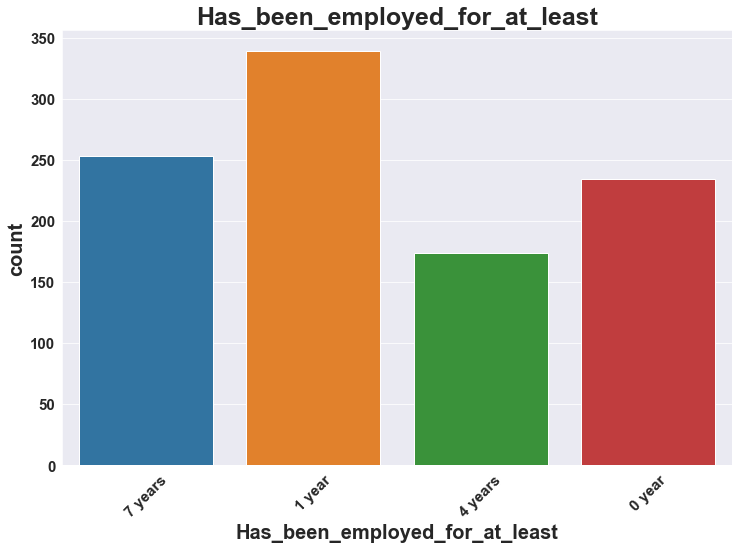

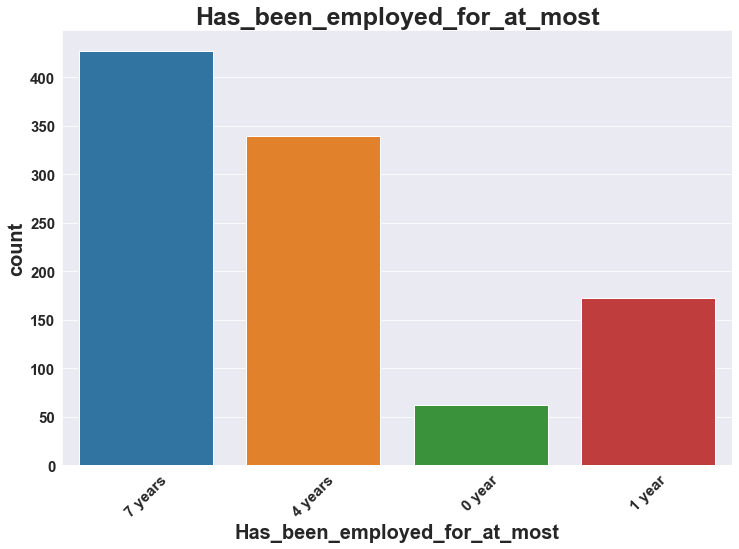

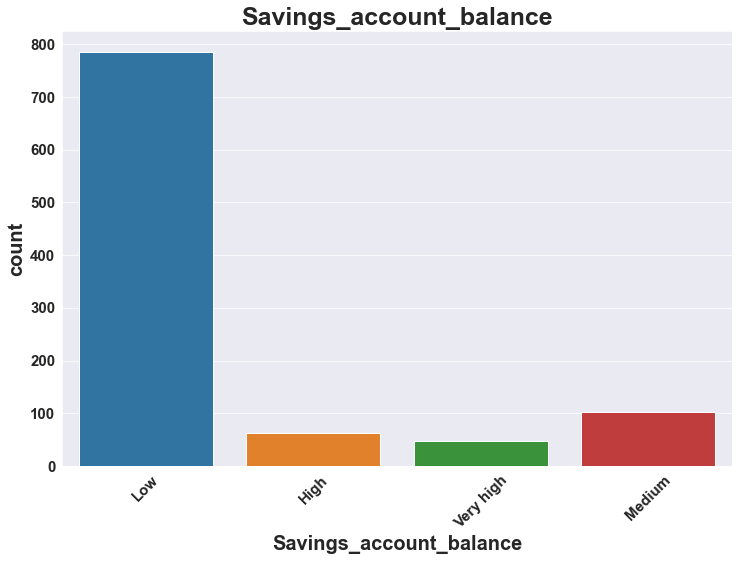

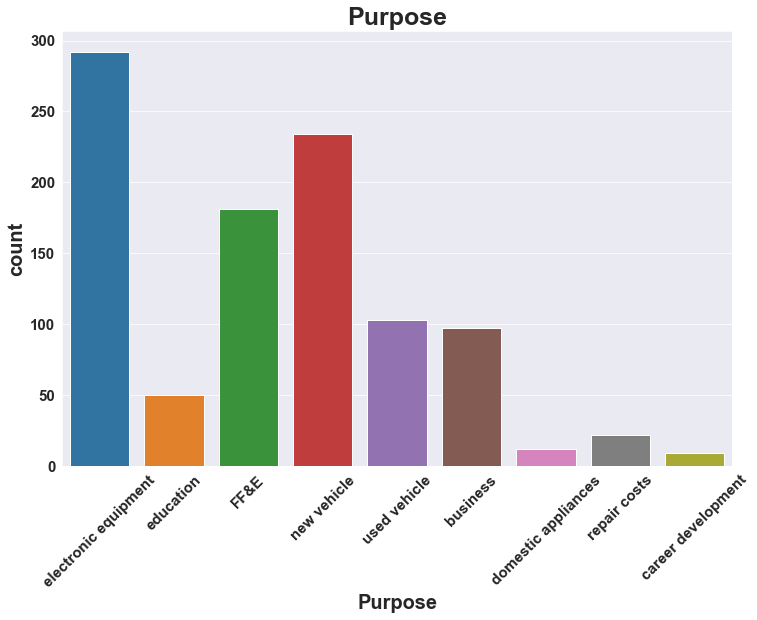

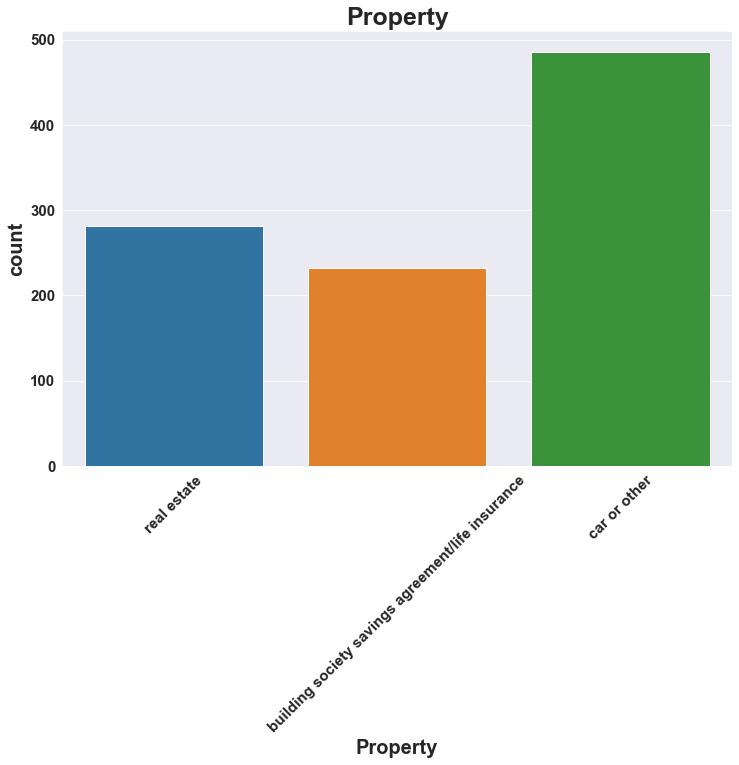

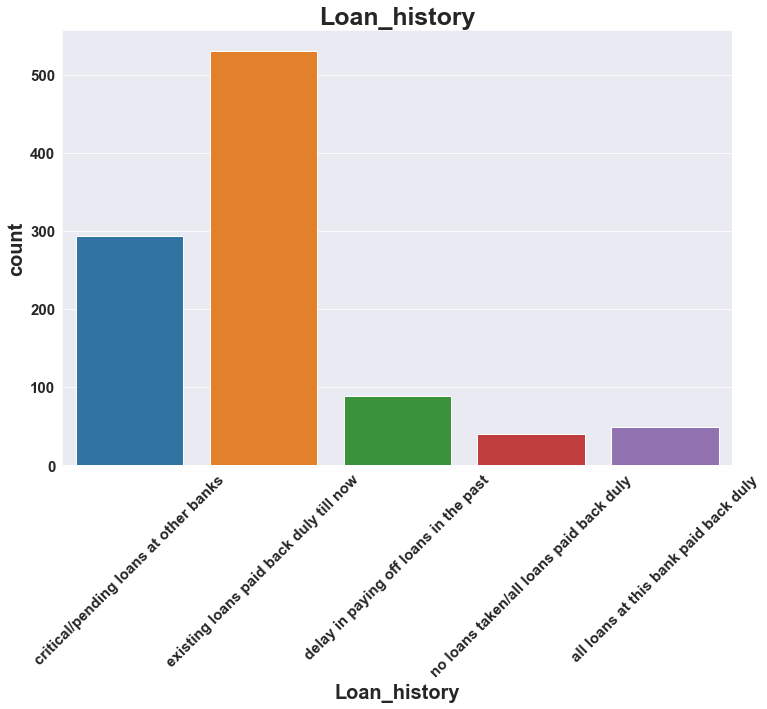

In [38]:
for category in categorical_var:
    check_count_viz(category)

## INFERENCE:

1.More males are applying for a loan than females. 
<br> 2.Single people are opting for loan more than divorced/married/separated/widowed people.
<br> 3. Our dataset has more people who own a house than those who live for free or are renting one.
<br> 4. We have skilled employee/ Officer maximun in our dataset and very less number of unemployed/ unskilled - non resident.
<br> 5.Maximum number of people who are opting for loan are have been employed for atleast 1 year and at most 7 years.
<br> 6. Maximum applicants have low savings account balance.
<br> 7. The purpose of taking a loan for most applicants is to purchase a new vehicle/electronic equipments/FF&E(Furniture fixture and equipment)
<br> 8.Maximum number of applicants own some car(or other) or real estate.
<br> 9.Most(>50%) number of loan applicants have paid their loan back duly till now.

# Relation between the categorical variables and 'high_risk_applicant' column

In [43]:
def cat_var_pred_var_viz(variable):
    plt.figure(figsize=(12,8))
    sns.countplot(variable,hue='high_risk_applicant',data=merged_df, palette='pastel')
    plt.xlabel(variable)
    plt.xticks(rotation=45)
    plt.title(variable)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

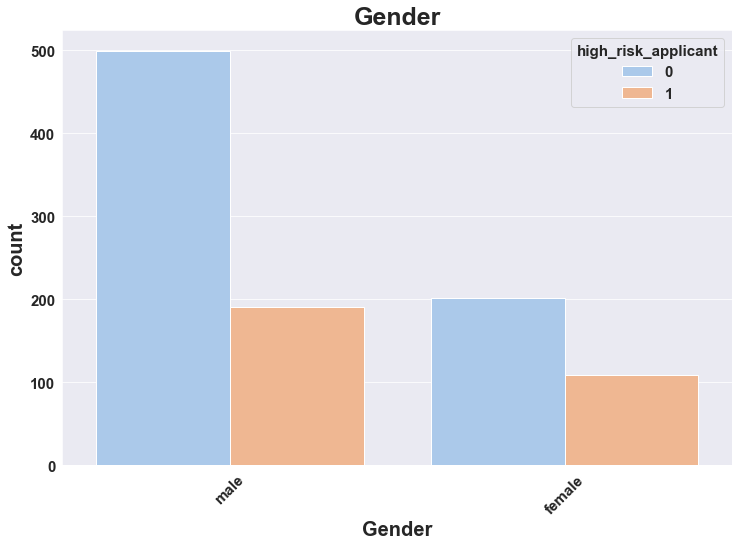

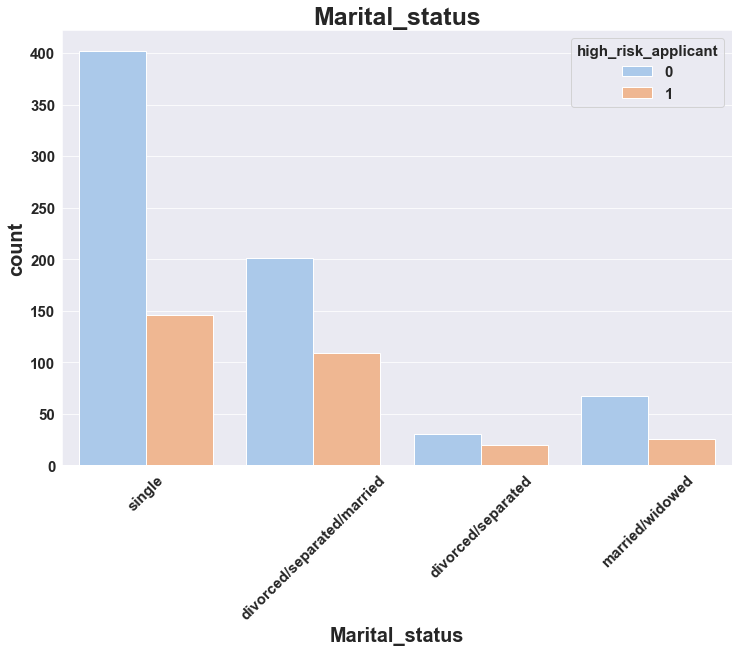

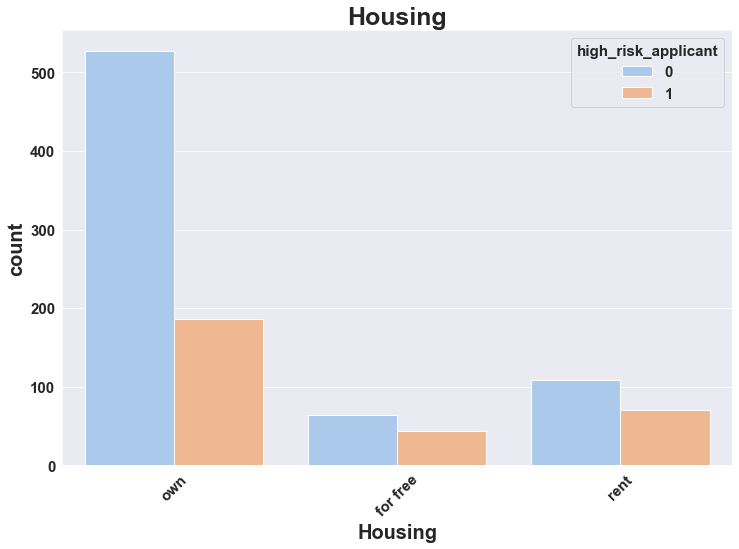

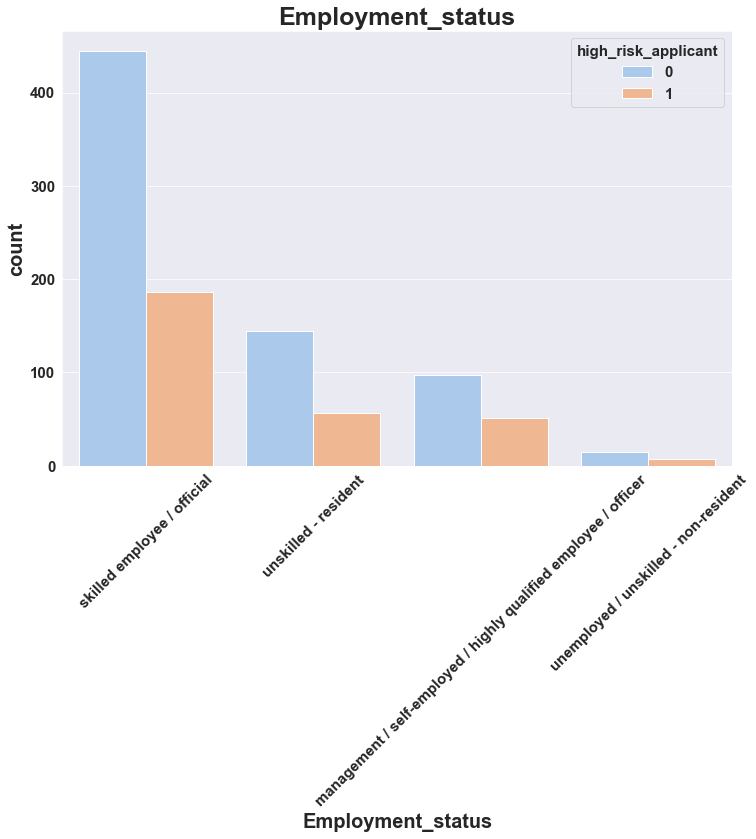

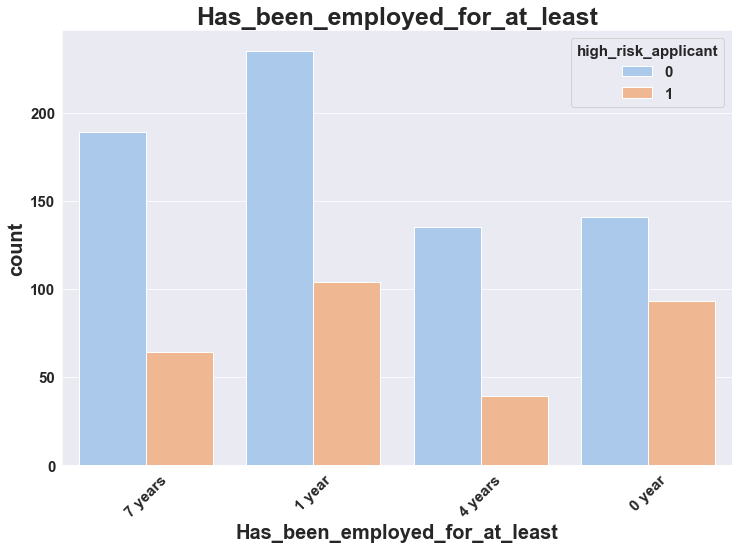

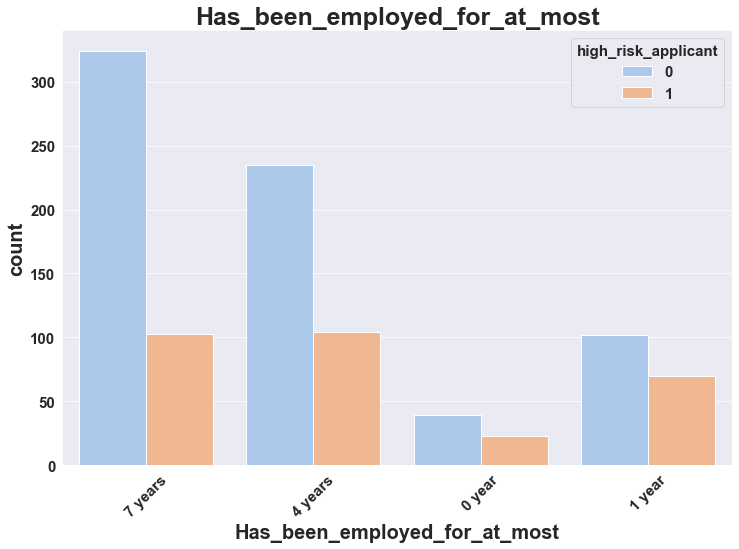

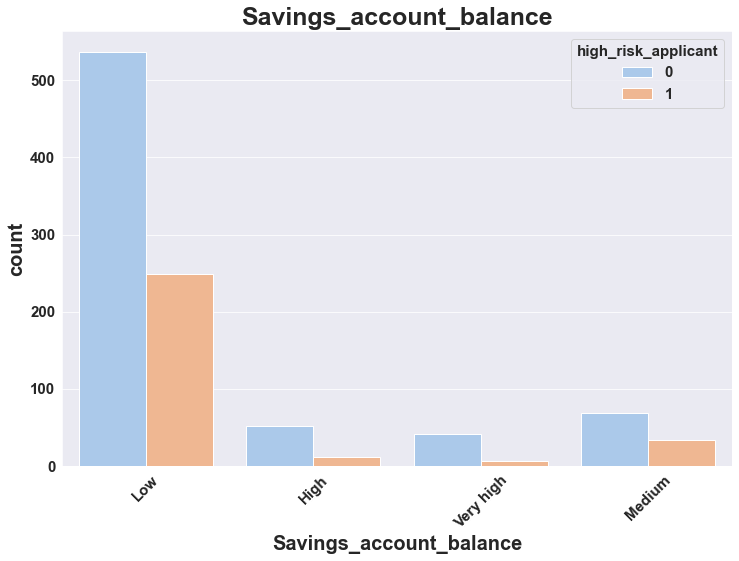

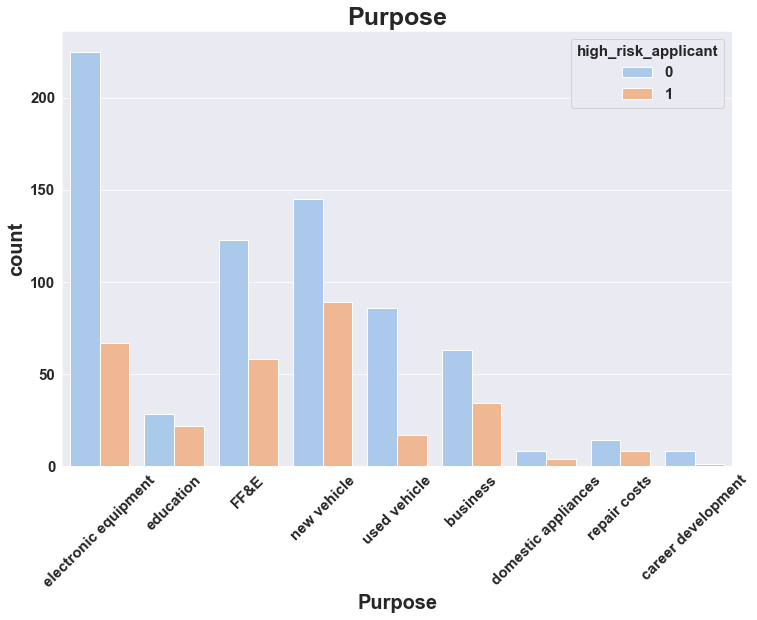

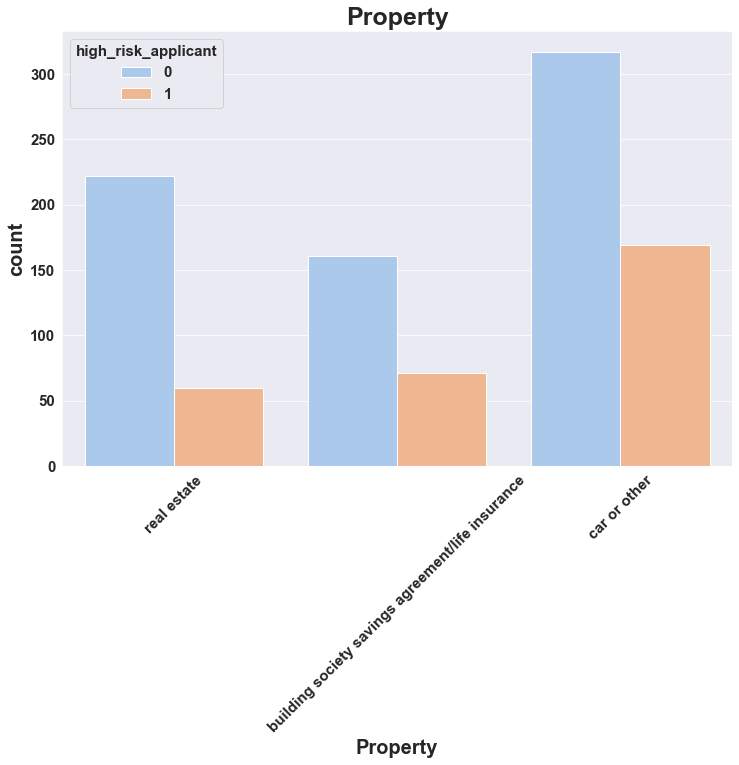

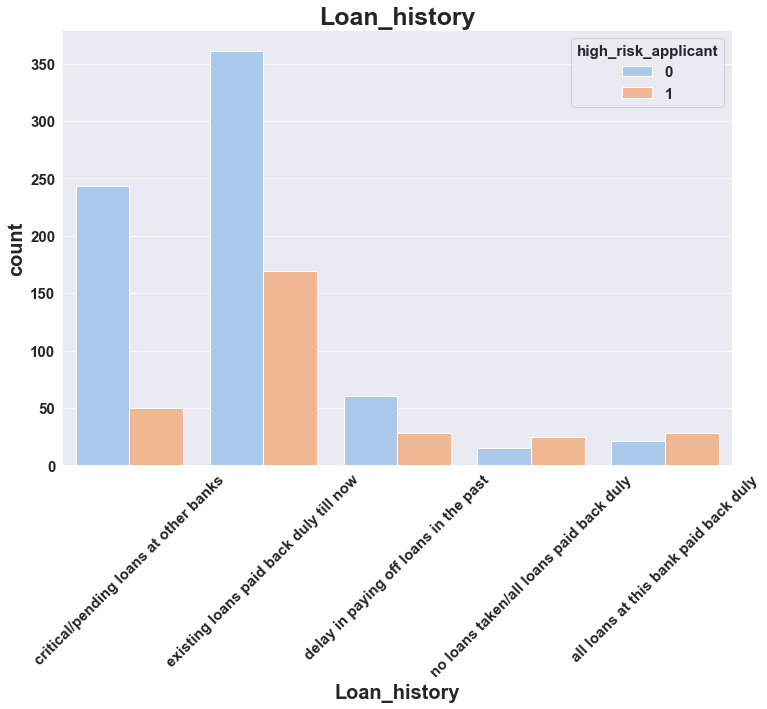

In [44]:
for category in categorical_var:
    cat_var_pred_var_viz(category)

# INFERENCE:

1.Higher risk of not getting back the loan in females than in males because according to the vizualization.(more than 50% of females have higher_risk)
<br>2.Separated and divorced people also have higher risk.
<br>3.People who live for free or in rent have higher risk.
<br>4.People who are unskilled-non-resident/unemployed have high risk.
<br>5.People who are employed for 0 or 1 year have high risk.
<br>6.People who have savings account balance as 'low' or ' medium' are also high risk applicants.
<br>7.People wanting loan for education,new vehicle and repair costs are high risk applicants.
<br>8.People taking a loan for car or other are high risk applicants.


# Studying the Numerical Variables

In [45]:
#check numerical columns
num_var = merged_df._get_numeric_data()

#drooping label from numerical features
num_var.drop('high_risk_applicant',inplace =True, axis = 1)
num_var

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank
0,67,1,4,1,6,1169000,4,0,0,2
1,22,1,2,1,48,5951000,2,0,0,1
2,49,2,3,1,12,2096000,2,0,0,1
3,45,2,4,1,42,7882000,2,0,1,1
4,53,2,4,1,24,4870000,3,0,0,2
...,...,...,...,...,...,...,...,...,...,...
995,31,1,4,1,12,1736000,3,0,0,1
996,40,1,4,1,30,3857000,4,0,0,1
997,38,1,4,1,12,804000,4,0,0,1
998,23,1,4,1,45,1845000,4,0,0,1


#### We will now visualize the distribution of various numerical features.

We will now create a function which will create a distplot every time a feature in passed in that function.

In [48]:
def num_var_viz(variable):
    plt.figure(figsize=(12,8))
    sns.distplot(merged_df[variable], color='blue')
    plt.xlabel(variable)
    plt.title(variable);

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

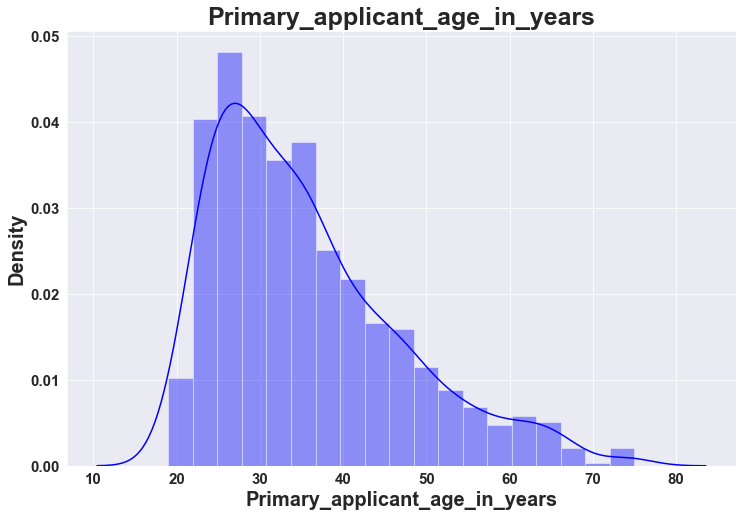

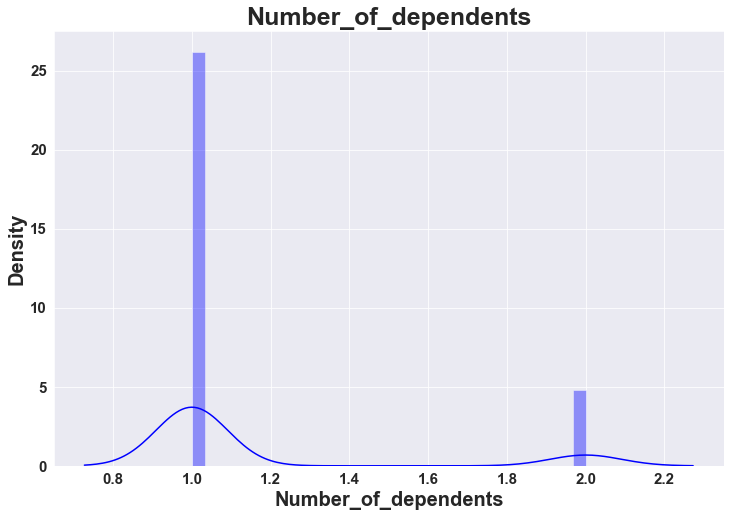

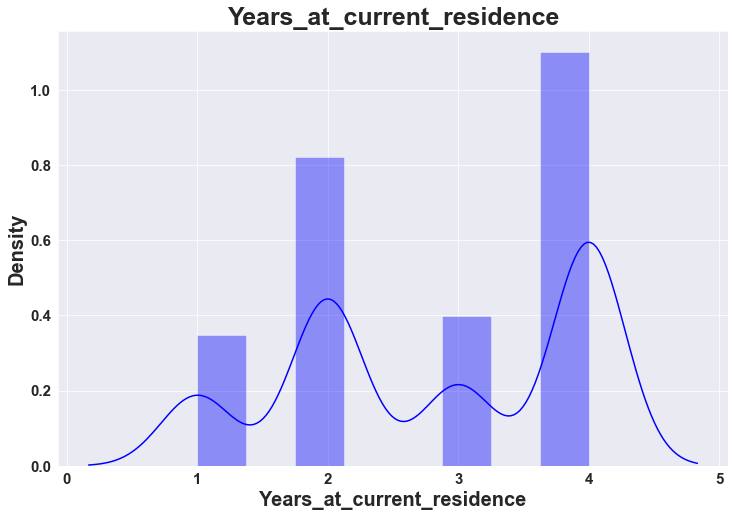

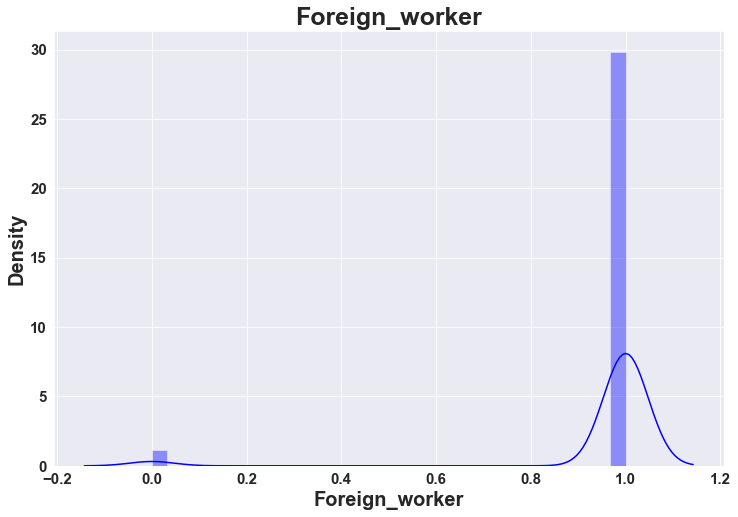

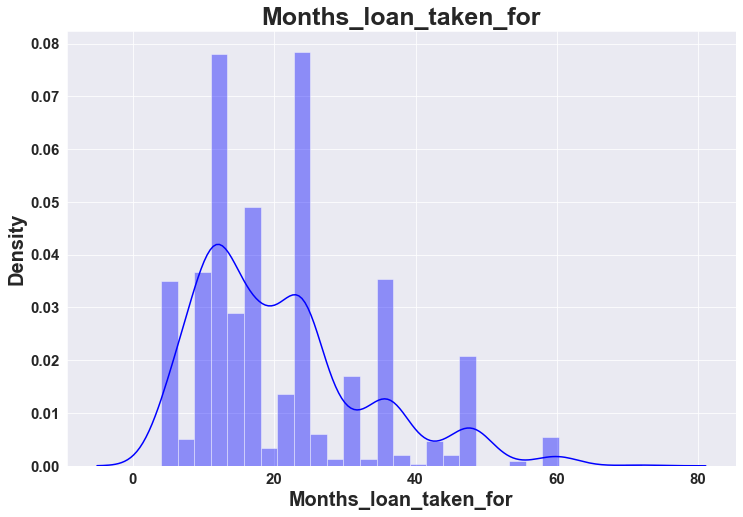

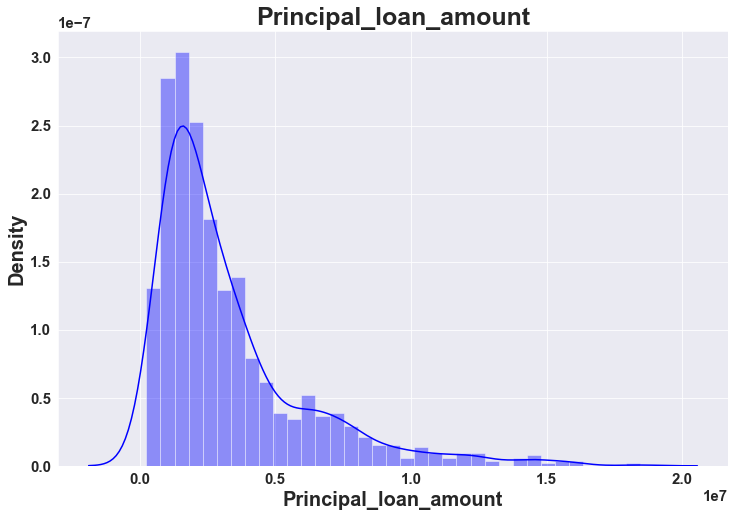

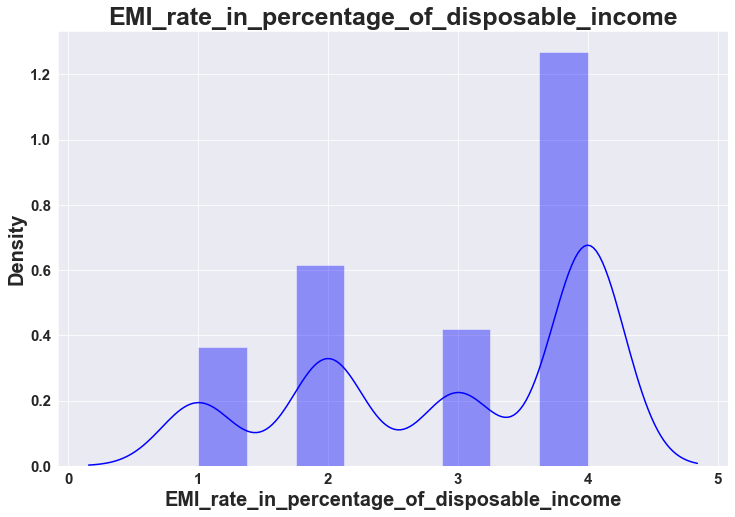

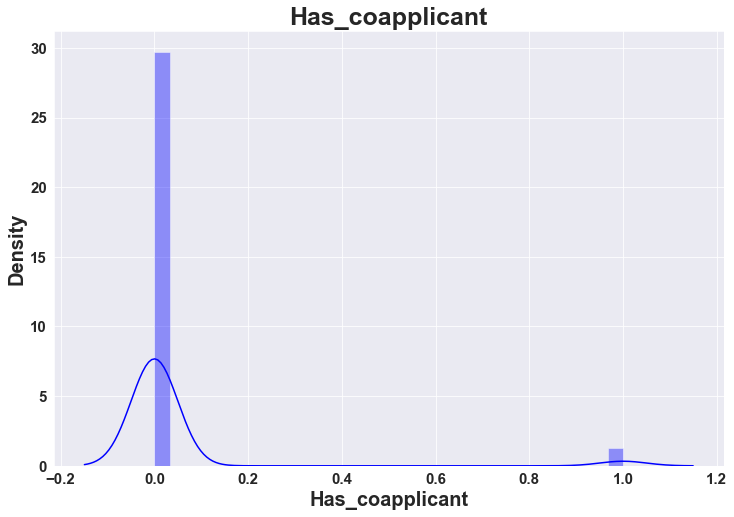

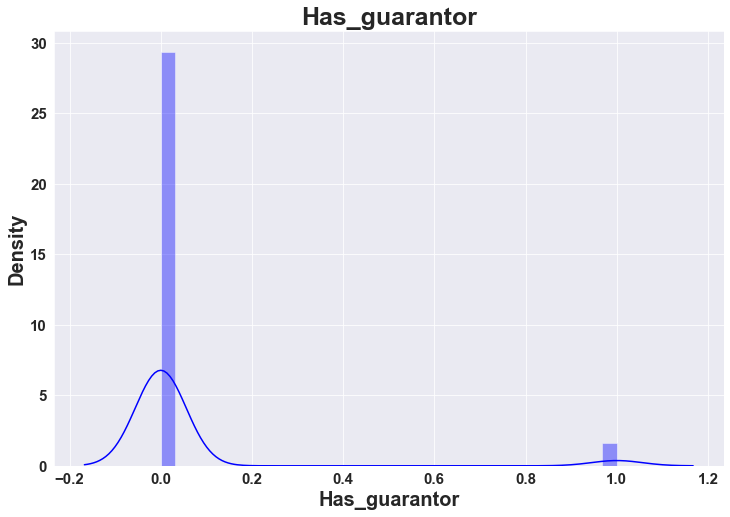

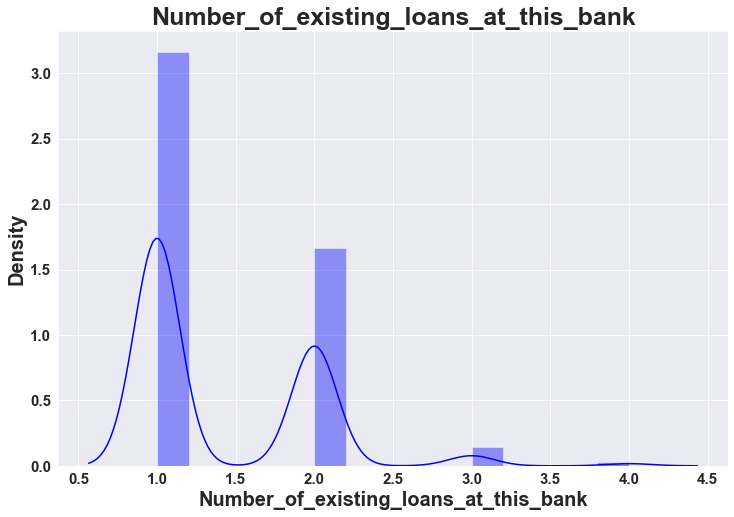

In [49]:
for num_feature in num_var:
    num_var_viz(num_feature)

# INFERENCE

1.The age column is right skewed.
<br> 2. The features namely- Number_of_dependents, years_at_current_residence, foreign worker,EMI_rate_percenytage_for_disposable_income,Has_guarantor, has_coapplicant, Number_of_exisiting_loan_at_this_bank show distribution over discrete values, hance they can be treated as categorical variable during model training.

## Relation of numerical features with 'high_risk_applicant' column

In [54]:
def num_var_pred_var_viz(variable):
    plt.figure(figsize=(12,8))
    sns.displot(data=merged_df,x=variable,hue='high_risk_applicant',kde='True')
    plt.xlabel(variable)
    plt.title(variable);

<Figure size 864x576 with 0 Axes>

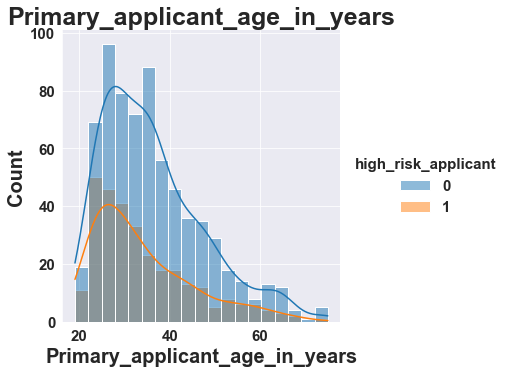

<Figure size 864x576 with 0 Axes>

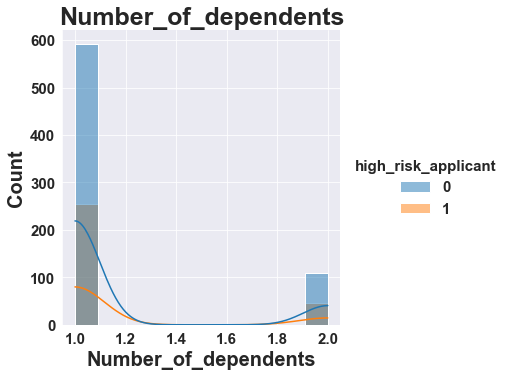

<Figure size 864x576 with 0 Axes>

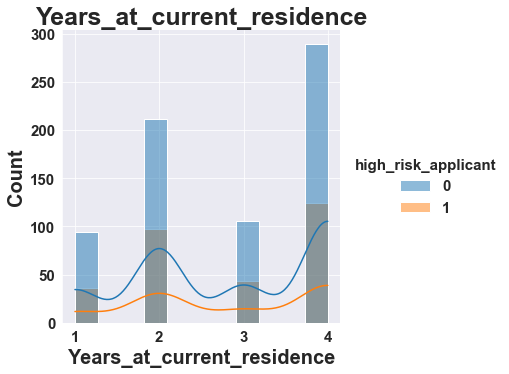

<Figure size 864x576 with 0 Axes>

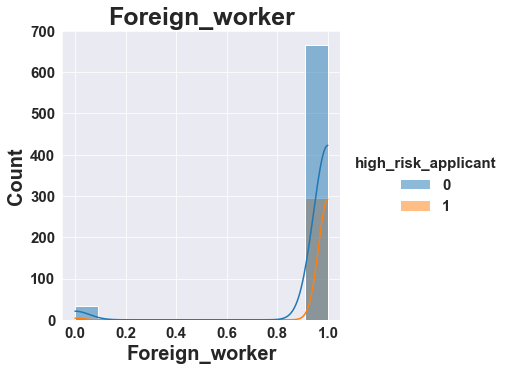

<Figure size 864x576 with 0 Axes>

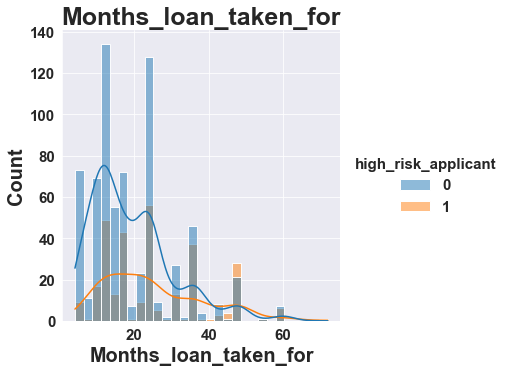

<Figure size 864x576 with 0 Axes>

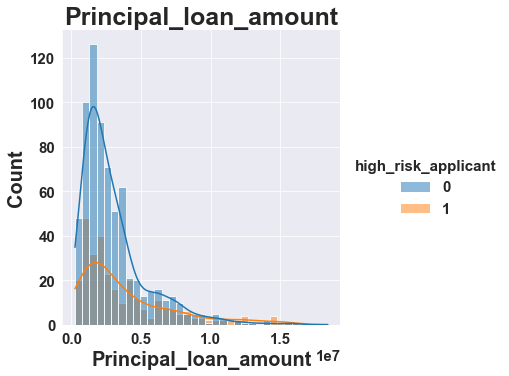

<Figure size 864x576 with 0 Axes>

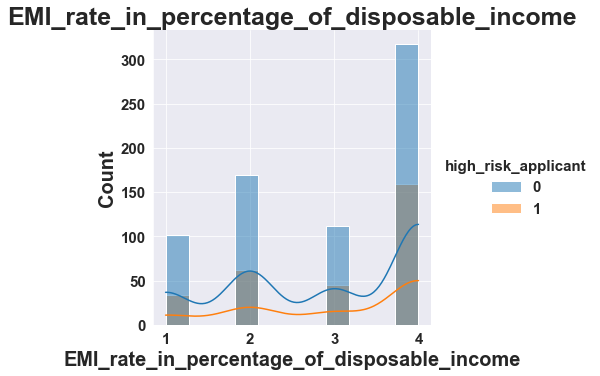

<Figure size 864x576 with 0 Axes>

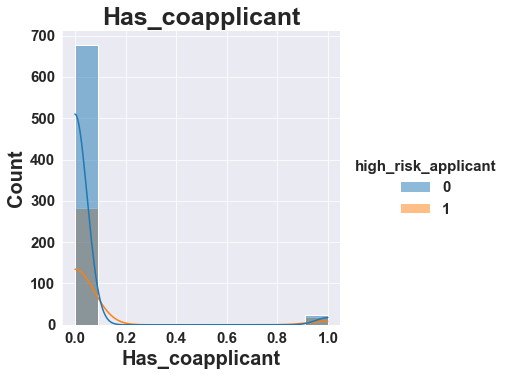

<Figure size 864x576 with 0 Axes>

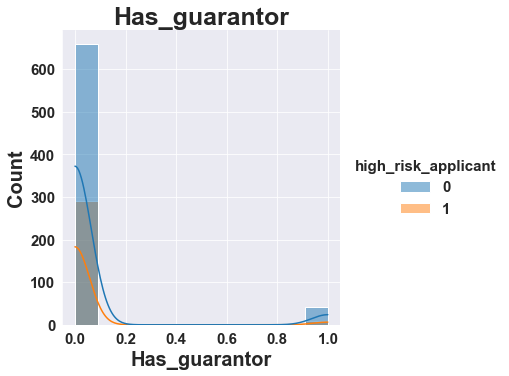

<Figure size 864x576 with 0 Axes>

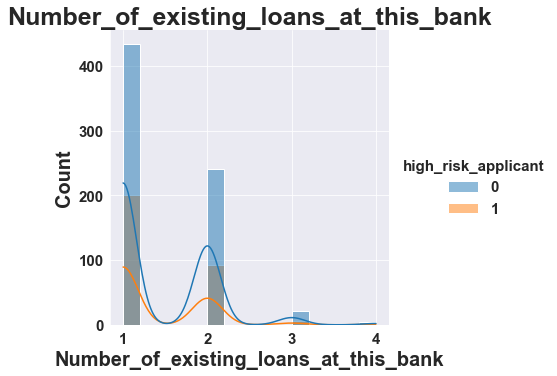

In [55]:
for num_feature in num_var:
    num_var_pred_var_viz(num_feature)

# INFERENCE

1.People with age between 25-40 years are high risk applicants.
<br>2.Foreigner workers are also high risk applicants.
<br>3.Applicants who have loan duration less than 25 are at higher risk.
<br>4.Applicants with high EMI rate have higher risk.
<br>5.People who have no co-applicant or guarantor are at a higher risk.


# Displaying the Correlation

In [56]:
merged_df.corr()

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
Primary_applicant_age_in_years,1.000,0.118,0.266,0.006,-0.036,0.033,0.058,-0.018,-0.024,0.149,-0.091
Number_of_dependents,0.118,1.000,0.043,-0.077,-0.024,0.017,-0.071,-0.033,0.037,0.110,-0.003
Years_at_current_residence,0.266,0.043,1.000,0.054,0.034,0.029,0.049,0.002,-0.028,0.090,0.003
Foreign_worker,0.006,-0.077,0.054,1.000,0.138,0.050,0.090,-0.066,-0.097,0.010,0.082
Months_loan_taken_for,-0.036,-0.024,0.034,0.138,1.000,0.625,0.075,0.030,-0.040,-0.011,0.215
Principal_loan_amount,0.033,0.017,0.029,0.050,0.625,1.000,-0.271,0.079,-0.065,0.021,0.155
EMI_rate_in_percentage_of_disposable_income,0.058,-0.071,0.049,0.090,0.075,-0.271,1.000,-0.013,-0.006,0.022,0.072
Has_coapplicant,-0.018,-0.033,0.002,-0.066,0.030,0.079,-0.013,1.000,-0.048,-0.006,0.063
Has_guarantor,-0.024,0.037,-0.028,-0.097,-0.040,-0.065,-0.006,-0.048,1.000,-0.025,-0.055
Number_of_existing_loans_at_this_bank,0.149,0.110,0.090,0.010,-0.011,0.021,0.022,-0.006,-0.025,1.000,-0.046


## Displaying the correlation heatmap

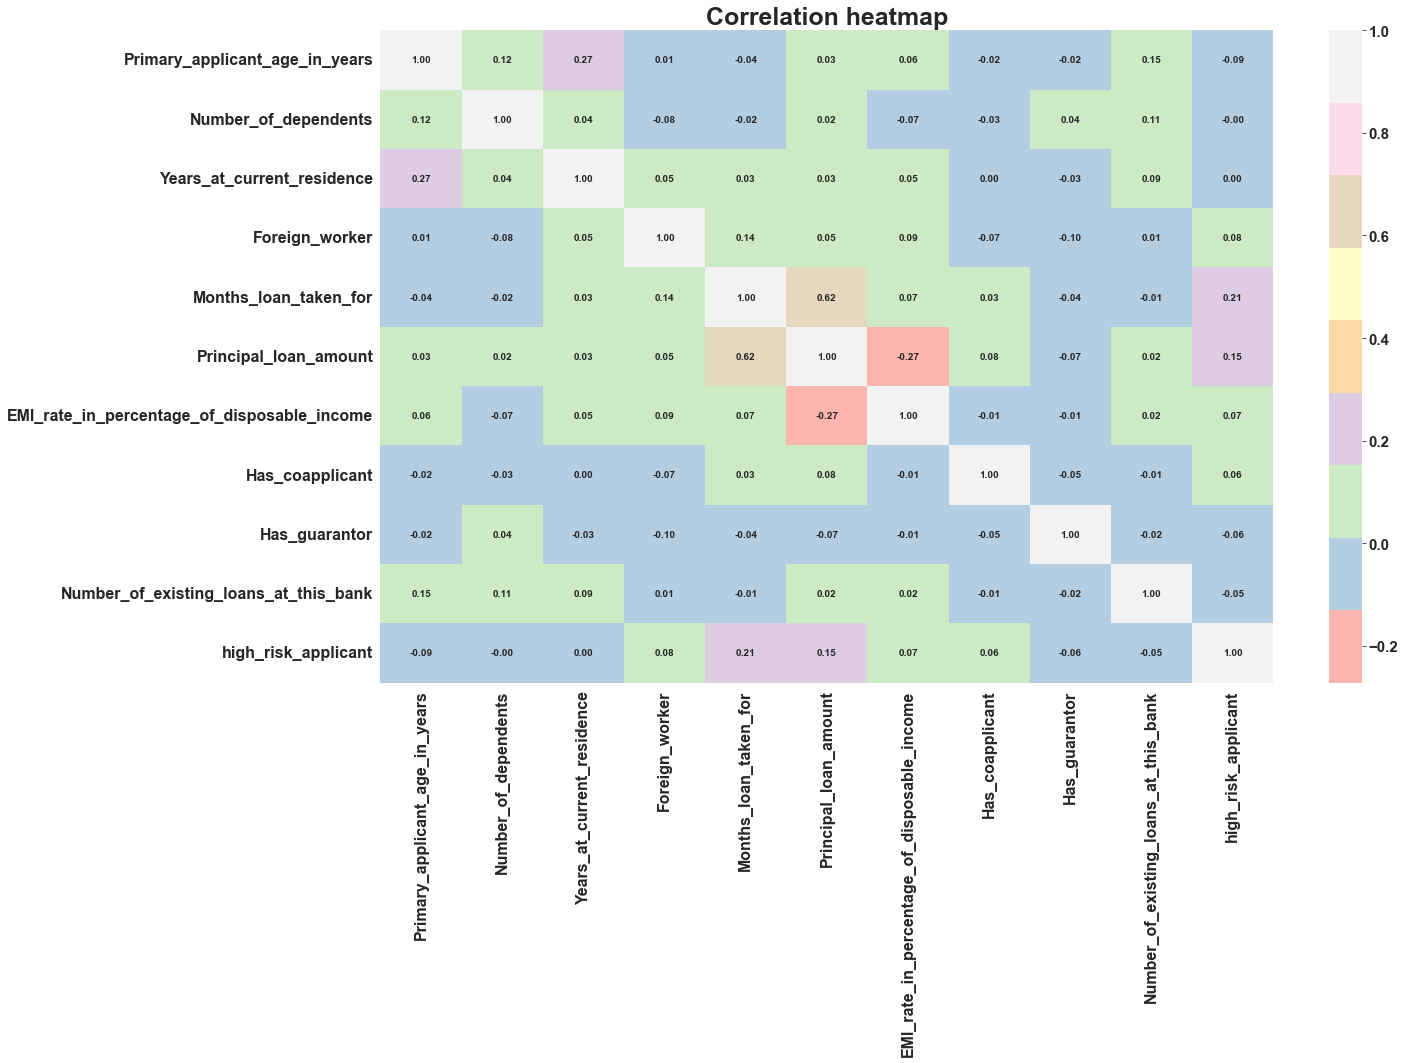

In [63]:
plt.figure(figsize=(20,12))
sns.heatmap(merged_df.corr(),annot=True,fmt = '.2f',cmap='Pastel1')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Correlation heatmap');

# INFERENCE:

1.High_risk_applicant has high positive correlation with months_loan_taken_for and Principal_loan_amount
<br>2.The principal loan amount has high positive correlation with months loan taken for as if the principal loan amount increases the time needed to repay it will also increase.
<br>3. We can also see that Principal loan amount has high r=negative correlation with the EMI Rate.(As the loan amount will increase, EMI rate will decrease)

#### We will now convert the clean data set to a csv file.

In [65]:
merged_df.to_csv('df.csv')

### How would you segment customers based on their risk (of default)?

We can segment the customers on the following features:
<br>1.Housing owned
<br>2.Foreigner Worker
<br>3.Has guarantor

### Which of these segments / sub-segments would you propose be approved?

1.Age(Primary_applicant_age_in_years)
<br>2.Savings_account_balance
<br>3.Has guarantor(Has_gurantor)
<br>4.Number of existing loans in the bank(Number_of_existing_loans_at_this_bank)
<br>5.How long has the customer been employed for.(Has_been_employed_for_at_least,Has_been_employed_for_at_most)
<br>6.Purpose for the loan.(Purpose)

## OBSERVATIONS ON THIS DATA

1.The objective of this data set was to determine whether an applicant has high or low credit risk,i.e, whether he or she will be able to repay the loan or not.
<br>2.The age of applicants varied from 19 to 75 years, but after visualization we observed that the age was right skewed.
<br>3.The credit risk of females, separated and divorced people was higher than other.
<br>4.Applicants who have age between 25-40 years are at a higher risk.
<br>5.Applicants whose purpose for loan is purchase of vehicle or education are also at a higher credit risk.
<br>6.Foreigners who have no guarantor are also like to default.
